In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

# Data Pre-processing

In [2]:
data_train = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_training-set.csv')
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

In [3]:
data_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
print("Size: " + str(data_train.size))
print("Shape: " + str(data_train.shape))
print("-----------------------")
print(data_train.value_counts('attack_cat'))
print("-----------------------")
print(data_train.value_counts('label'))

Size: 3704940
Shape: (82332, 45)
-----------------------
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64
-----------------------
label
1    45332
0    37000
Name: count, dtype: int64


In [6]:
# Handle missing value and duplicate if any
data_train.dropna(inplace=True)
data_train.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Label Distribution')

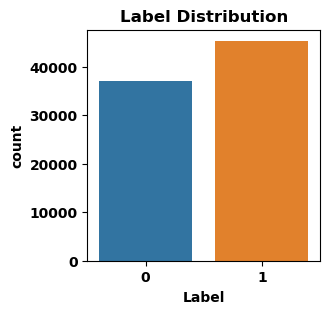

In [7]:
#Attack and Normal distribution
plt.figure(figsize=(3, 3))
sns.countplot(data=data_train, x="label")
plt.xlabel("Label")
plt.title("Label Distribution")

Text(0.5, 1.0, 'Attack Category Distribution')

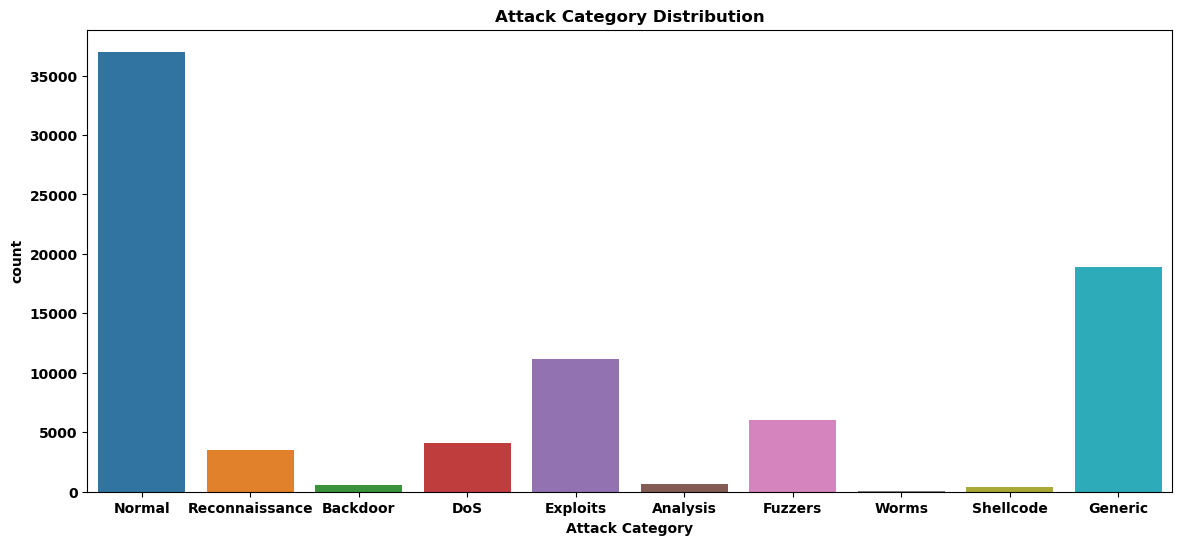

In [8]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

In [9]:
#All_feature
all_feature = data_train.columns
all_feature

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [10]:
#Split Attack and Normal from dataframe
data_train_attack = data_train[data_train['label'] == 1]
data_test_attack = data_test[data_test['label'] == 1]

#Optional
#data_train_normal = data_train[data_train['label'] == 0]
#data_test_normal = data_test[data_test['label'] == 0]

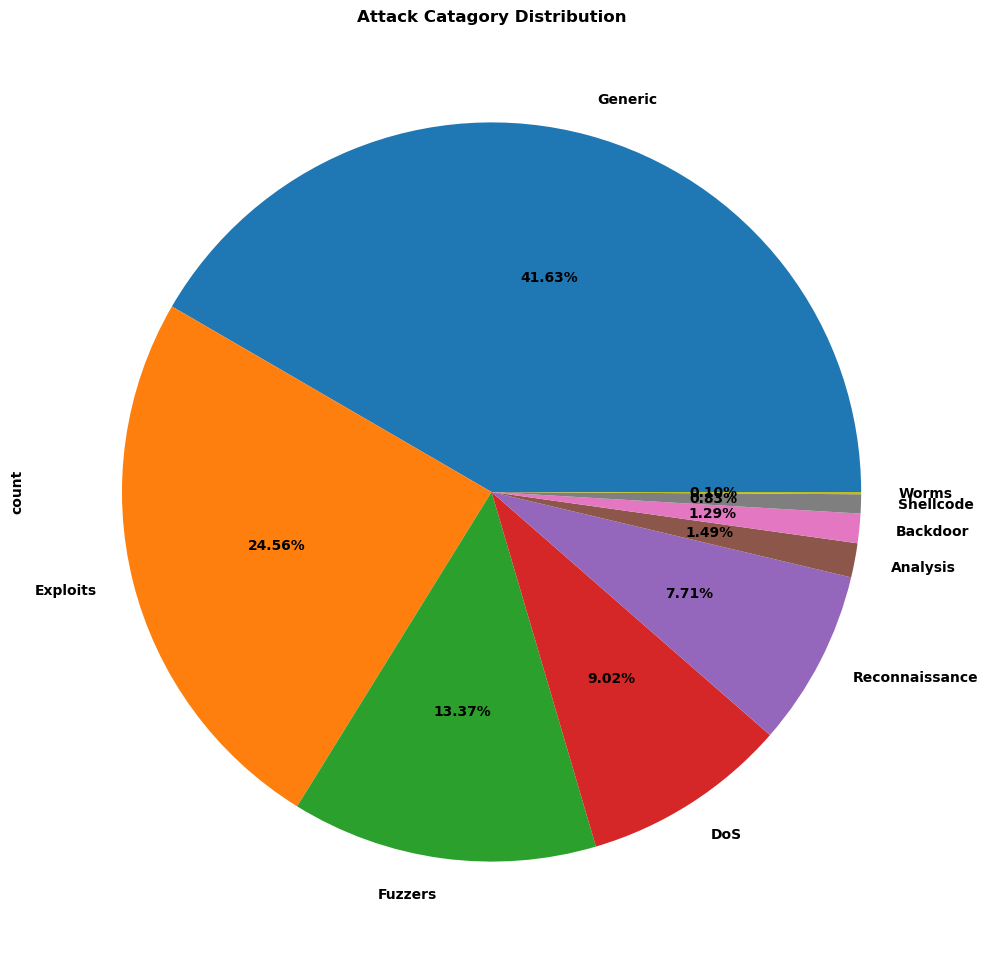

In [11]:
#Attack Category Distribution
plt.figure(figsize=(12, 12))
data_train_attack['attack_cat'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Attack Catagory Distribution")
plt.show()

Text(0.5, 1.0, 'Attack Category Distribution')

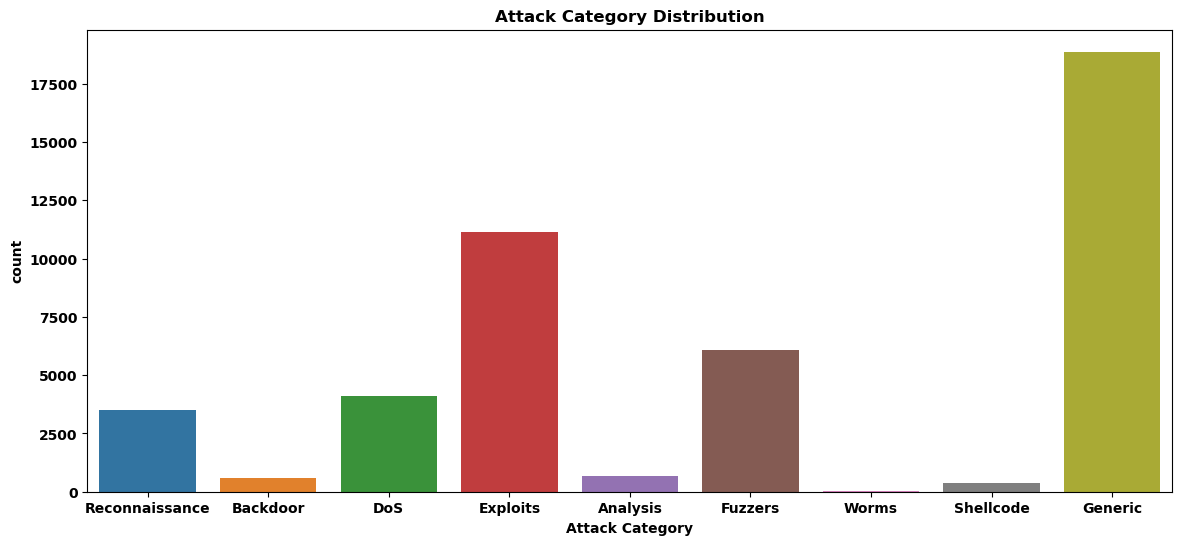

In [12]:
#Attack Category
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

## Encode Train Data

In [13]:
#Encode attack_cat
le = LabelEncoder()
data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])

#Encode state
data_train_attack['state'] = le.fit_transform(data_train_attack['state'])

#Encode service
data_train_attack['service'] = le.fit_transform(data_train_attack['service'])

#Encode proto
data_train_attack['proto'] = le.fit_transform(data_train_attack['proto'])

data_train_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\50120460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['attack_cat'] = le.fit_transform(data_train_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\50120460.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_attack['state'] = le.fit_transform(data_train_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\50120460.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Encode Test Data

In [14]:
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\230897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\230897011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_13008\230897011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

## Normalization

In [ ]:
# Normalization


Text(0.5, 1.0, 'Attack Category Distribution')

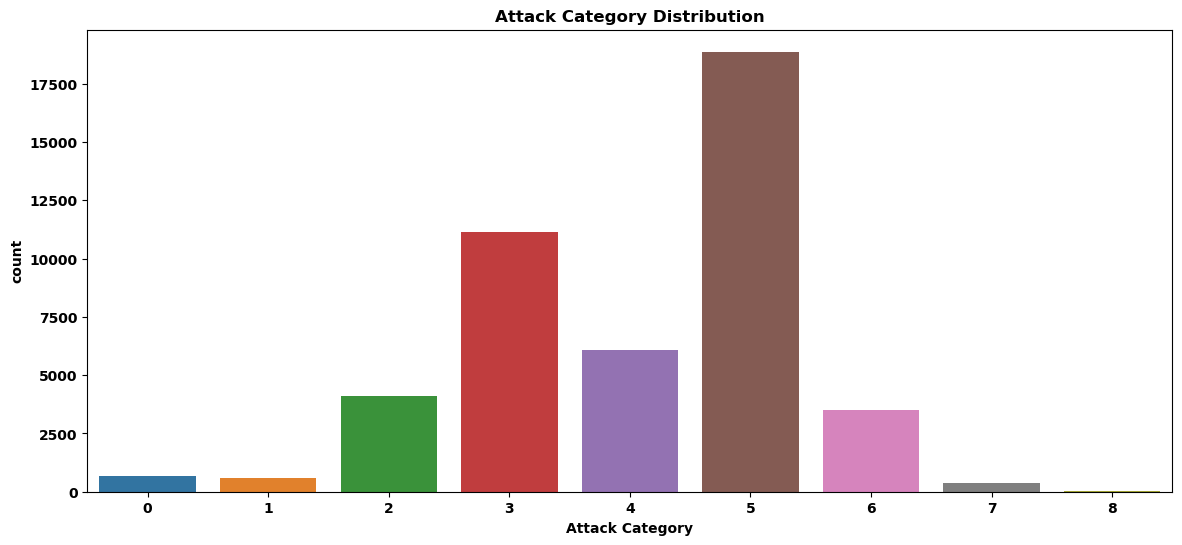

In [15]:
#After Attack Category Encoding
plt.figure(figsize=(14, 6))
sns.countplot(data=data_train_attack, x="attack_cat")
plt.xlabel("Attack Category")
plt.title("Attack Category Distribution")

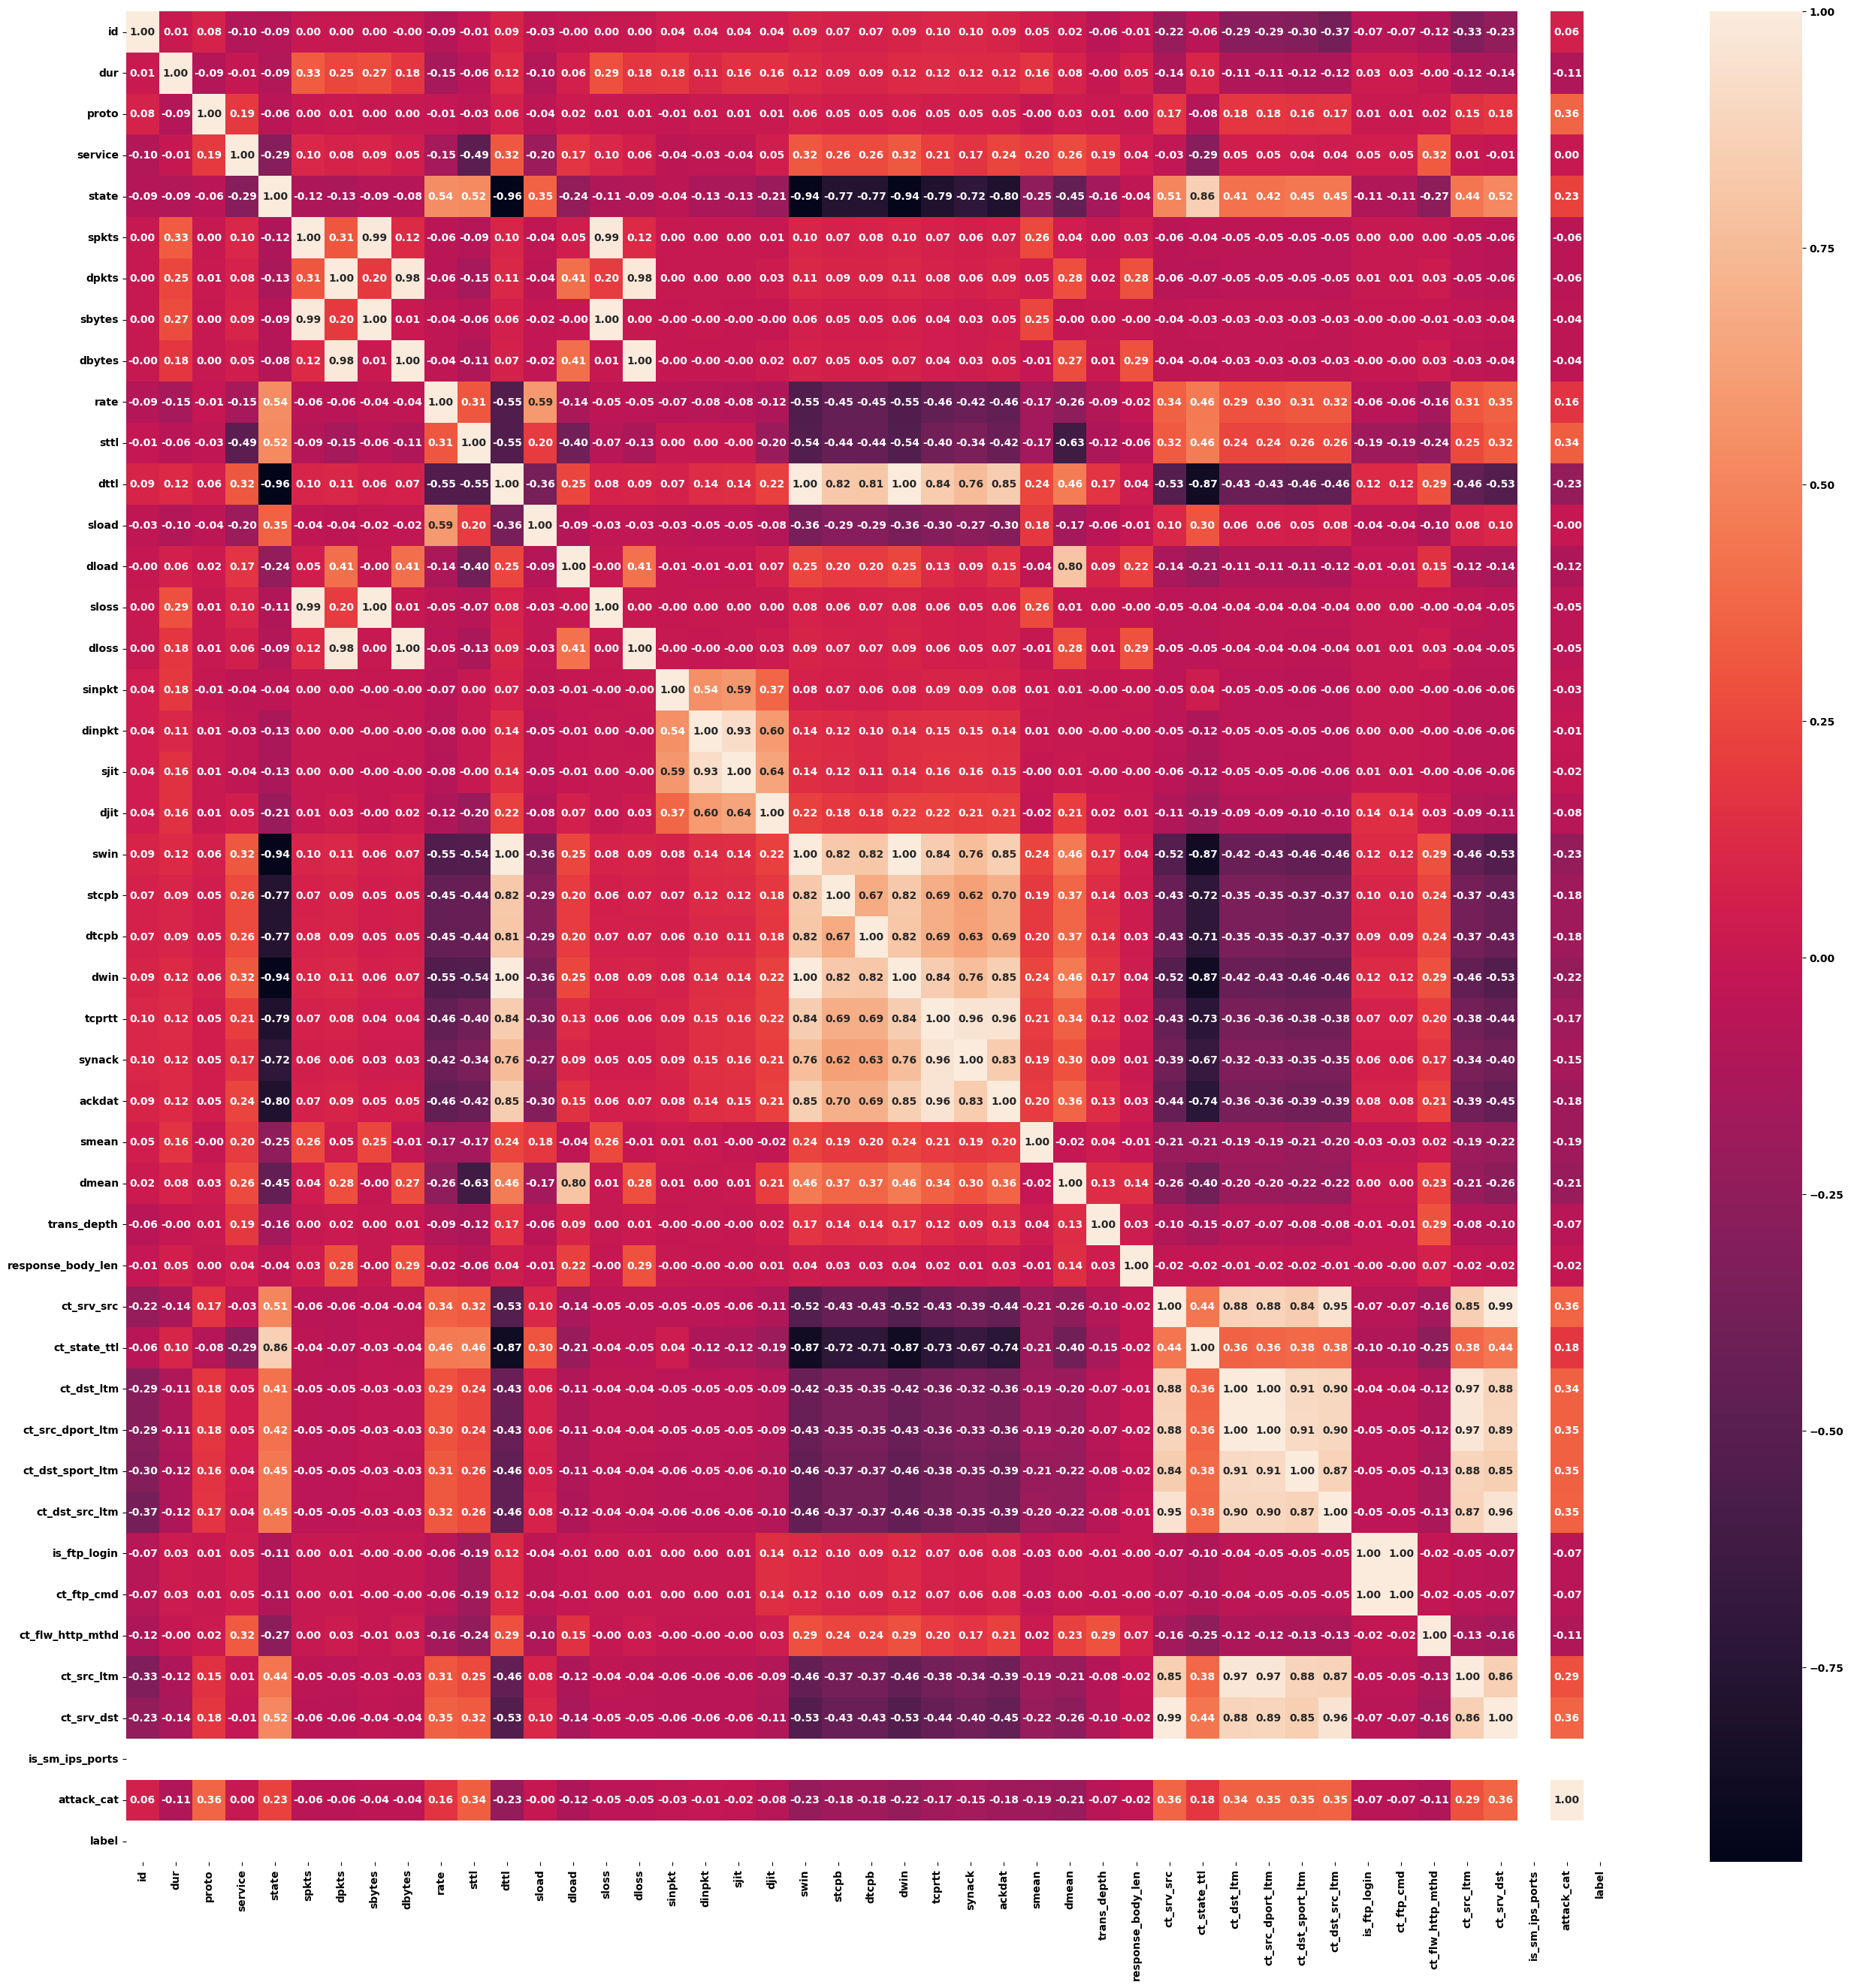

In [21]:
#Correlation between feature
#%matplotlib inline
plt.figure(figsize=[32,32])
sns.heatmap(data_train_attack.corr(), annot=True, fmt=".2f")
plt.show()

## Feature Selection

In [ ]:
#Feature Selection
feature = data_train_attack.drop(['id', 'is_sm_ips_ports', 'label', 'dur', 'proto', 'ct_dst_ltm', 'ct_ftp_cmd'], axis=1)
feature.dtypes

# Balancing Data

In [ ]:
#Splitting the dataset into dependent and independent feature
X_train = feature.drop(columns=['attack_cat'])
y_train = feature["attack_cat"]

X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'is_sm_ips_ports', 'label', 'dur', 'proto', 'ct_dst_ltm', 'ct_ftp_cmd'])
y_test = data_test_attack["attack_cat"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## SMOTE-Tomek Links

In [ ]:
stl = SMOTETomek(sampling_strategy='auto')
#stl = SMOTETomek(sampling_strategy=dict({2: 8000, 3: 7800}))
X_stl, y_stl = stl.fit_resample(X_train, y_train)

X_stl.shape, y_stl.shape

In [ ]:
#Create new dataframe from X_stl and y_stl to count every attack
data_stl = pd.concat([X_stl, y_stl], axis=1)

sns.countplot(data=data_stl, x="attack_cat")

In [ ]:
#data_stl.drop_duplicates(inplace=True)
print(data_stl.value_counts('attack_cat'))
print("--------------------")
print("Shape: " + str(data_stl.shape))
print("--------------------")
print("Duplicates: " + str(data_stl.duplicated().sum()))

# Model Evaluation

In [ ]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    f1_score.append(round(b, 5))
    recall.append(round(c, 5))
    precision.append(round(d, 5))

In [ ]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_train, y_test, p_train, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_train = metrics.accuracy_score(y_train, p_train)
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on training Data: {:.5f}".format(acc_train))
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing f1 score
    f1_score_train = metrics.f1_score(y_train, p_train, average='macro')
    f1_score_test = metrics.f1_score(y_test, p_test, average='macro')
    print("F1 score on training Data: {:.5f}".format(f1_score_train))
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing recall score
    recall_score_train = metrics.recall_score(y_train, p_train, average='macro')
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on training Data: {:.5f}".format(recall_score_train))
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing precision score
    precision_score_train = metrics.precision_score(y_train, p_train, average='macro')
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("F1 score on training Data: {:.5f}".format(precision_score_train))
    print("F1 score on test Data: {:.5f}\n".format(precision_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, f1_score_test, recall_score_test, precision_score_test)

## Training, Testing, Evaluation

### Decision Tree

In [ ]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier

#instantiate the model
destree = DecisionTreeClassifier(max_depth=30)

#fit the model
destree.fit(X_stl, y_stl)

In [ ]:
#predicting
p_train_destree = destree.predict(X_stl)
p_test_destree = destree.predict(X_test)

In [ ]:
#call report function
model_report(str(destree), y_stl, y_test, p_train_destree, p_test_destree)

In [ ]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
depth = range(1, 30)
for n in depth:
    destree_test = DecisionTreeClassifier(max_depth=n)

    destree_test.fit(X_stl, y_stl)
    #record training set accuracy
    training_accuracy.append(destree_test.score(X_stl, y_stl))
    #recor generalization accuracy
    test_accuracy.append(destree_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

### Random Forest

In [ ]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
ranfor = RandomForestClassifier(n_estimators=20)

#fit the model
ranfor.fit(X_stl, y_stl)

In [ ]:
#predicting
p_train_ranfor = ranfor.predict(X_stl)
p_test_ranfor = ranfor.predict(X_test)

In [ ]:
#call report function
model_report(str(ranfor), y_stl, y_test, p_train_ranfor, p_test_ranfor)

In [ ]:
#plotting the train and test model accuracy
training_accuracy = []
test_accuracy = []

#try max_depth from 1 to 30
n_est = range(1, 20)
for n in n_est:
    ranfor_test = RandomForestClassifier(n_estimators=n)

    ranfor_test.fit(X_stl, y_stl)
    #record training set accuracy
    training_accuracy.append(ranfor_test.score(X_stl, y_stl))
    #recor generalization accuracy
    test_accuracy.append(ranfor_test.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(n_est, training_accuracy, label="training accuracy")
plt.plot(n_est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

### XGBoost

In [ ]:
#import xgboost classifier
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier()

#fit the model
xgb.fit(X_stl, y_stl)

In [ ]:
#predicting
p_train_xgb = xgb.predict(X_stl)
p_test_xgb = xgb.predict(X_test)

In [ ]:
#call report function
model_report(str(xgb), y_stl, y_test, p_train_xgb, p_test_xgb)

### Gradient Boosting

In [ ]:
#import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#instantiate the model
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.7)

#fit the model
gbc.fit(X_stl, y_stl)

In [ ]:
#predicting
p_train_gbc = gbc.predict(X_stl)
p_test_gbc = gbc.predict(X_test)

In [ ]:
#call report function
model_report(str(gbc), y_stl, y_test, p_train_gbc, p_test_gbc)

# Result

## Comparison of Models

In [ ]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'F1 Score' : f1_score,
                       'Recall' : recall,
                       'Precision' : precision
                       })
result

In [ ]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['Recall'], ascending=False).reset_index(drop=True)
sorted_result

## Save to csv file

In [ ]:
#save result to csv file
sorted_result.to_csv('balanced_unsw-nb15_result.csv')